### Clustering

**OBJECTIVES**

- Practice clustering with `sklearn`
- Apply clustering to song data from spotify

----
*Question*: 

```
Hi Jacob, when and if you have a chance, I have a question, in class we have talked about all the great things we can do in python like interactive folium maps, stats and plotting. Now I have a question say we make an analysis, and we want to share our analysis with others like executives that don’t code, do you have any recommendations of how to share the information?
I was thinking like to add the information from code to like a website that is shared with people in the organization, or maybe I need to learn html, or SharePoint. Currently at work we use PowerBI, but when I tested Python script in PowerBI it didn’t seem to work for me, maybe it was the way I ran it, or most likely my configuration settings.
```

### Spotify 

In [1]:
import pandas as pd

In [2]:
songs = pd.read_csv('data/spotify-songs.csv')

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [4]:
songs.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit_song,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [6]:
songs_clean = pd.get_dummies(songs.drop(['track', 'artist', 'uri'], axis = 1))

In [7]:
songs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      41106 non-null  float64
 1   energy            41106 non-null  float64
 2   key               41106 non-null  int64  
 3   loudness          41106 non-null  float64
 4   mode              41106 non-null  int64  
 5   speechiness       41106 non-null  float64
 6   acousticness      41106 non-null  float64
 7   instrumentalness  41106 non-null  float64
 8   liveness          41106 non-null  float64
 9   valence           41106 non-null  float64
 10  tempo             41106 non-null  float64
 11  duration_ms       41106 non-null  int64  
 12  time_signature    41106 non-null  int64  
 13  chorus_hit        41106 non-null  float64
 14  sections          41106 non-null  int64  
 15  hit_song          41106 non-null  int64  
 16  decade_00s        41106 non-null  uint8 

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [10]:
kmeans_pipe = make_pipeline(StandardScaler(), KMeans())

In [12]:
kmeans_pipe.fit(songs_clean)

Pipeline(steps=[('standardscaler', StandardScaler()), ('kmeans', KMeans())])

In [14]:
songs_clean['cluster_label'] = kmeans_pipe.named_steps['kmeans'].labels_

In [15]:
import matplotlib.pyplot as plt 

In [16]:
import seaborn as sns

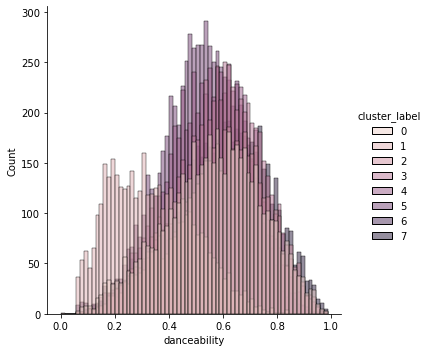

In [20]:
sns.displot(x='danceability', data = songs_clean, hue = 'cluster_label')

<AxesSubplot:xlabel='cluster_label'>

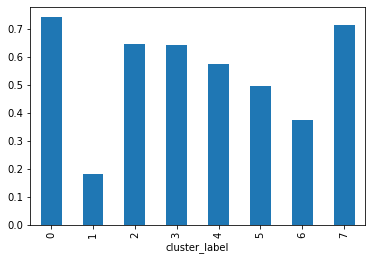

In [22]:
songs_clean.groupby('cluster_label')['energy'].mean().plot(kind = 'bar')

In [48]:
kmeans_pipe = make_pipeline(StandardScaler(), KMeans())
params = {'kmeans__n_clusters': range(10, 20)}

In [49]:
kmeans_grid = GridSearchCV(kmeans_pipe, param_grid=params)

In [50]:
kmeans_grid.fit(songs_clean)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': range(10, 20)})

In [51]:
kmeans_grid.best_params_

{'kmeans__n_clusters': 19}

In [55]:
songs_clean['cluster_label'] = kmeans_grid.predict(songs_clean)

<AxesSubplot:xlabel='cluster_label'>

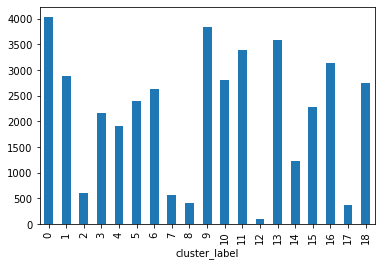

In [56]:
songs_clean.groupby('cluster_label')['energy'].size().plot(kind = 'bar')

In [59]:
songs.iloc[songs_clean[songs_clean['cluster_label'] == 4].index].tail(6)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit_song,decade
41083,Mess,Real Friends,spotify:track:5mcnyvVNv4MVtHA6YL6hJu,0.508,0.920,1,-4.387,1,0.0489,0.000007,0.864000,0.0853,0.699,90.027,188493,4,50.45824,8,0,10s
41084,Metal Militia,Exmortem,spotify:track:5f9cC3ZiiGcf2hq4L2DWyF,0.300,0.983,5,-5.809,0,0.0816,0.000244,0.771000,0.2580,0.347,109.517,247960,4,15.58687,9,0,10s
41086,Metal Blessing (Live 2002),Mortification,spotify:track:0Y0L0JE5HiTAKyWSkKusb7,0.271,0.982,7,-4.295,1,0.1210,0.000258,0.004530,0.5860,0.117,154.692,232867,4,82.72886,9,0,10s
41087,Trash - The London Suede Version,The London Suede,spotify:track:47VqgHgXvn4Cx2RVeQq2Tk,0.439,0.993,11,-2.923,1,0.1000,0.000937,0.000063,0.2850,0.157,124.609,245947,4,81.97844,9,0,10s
41092,Gimme D' Road - Carnival Mix,Calypso Rose,spotify:track:6Yk1qYbmPKdoqNrHYRFc9c,0.395,0.927,4,-4.418,1,0.1650,0.116000,0.000000,0.4410,0.941,188.384,191905,3,68.27089,8,0,10s
41097,What Now,Rihanna,spotify:track:0aUWfpD3PlSv3FTTKcT2rN,0.402,0.696,8,-4.799,0,0.0448,0.047600,0.000000,0.6280,0.227,180.158,243093,3,31.53643,11,1,10s


In [60]:
songs.to_csv('songs_clustered.csv')